In [1]:
import tensorflow as tf
from keras.layers import Dense, LSTM, Dropout
from keras.models import Sequential
from keras.utils import to_categorical

2023-07-08 06:05:31.182977: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-07-08 06:05:31.184237: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-08 06:05:31.216116: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-08 06:05:31.216664: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-08 06:05:32.058925: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

In [2]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
no_sequences = 30
words = ['hello', 'world', 'i_am', 'yash']
PATH = '/home/yash/Desktop/Code/trackpad_text_detection/word_data/'
# x = [np.load("".join(PATH + i + '/' + str(j) + '.npy')) for i in words for j in range(no_sequences)]

In [3]:
# len(x)
y = np.array([i for i, _ in enumerate(words) for j in range(no_sequences)])
y = to_categorical(y)

In [4]:
# x = np.array(x)#.reshape((-1, 4,2))
# x = np.reshape(x, (-1, 1000, 2))
# x = x.astype('float32')
# x = np.reshape(x, (1, 6, 1000))
# x.shape

In [5]:
# lstm_model = Sequential()
# lstm_model.add(LSTM(128, activation='relu', input_shape=(1100,2),  return_sequences=True,))
# # lstm_model.add(Dropout(0.2))
# lstm_model.add(LSTM(128, activation='relu'))
# # lstm_model.add(Dropout(0.2))
# # lstm_model.add(Dense(32,activation='relu'))
# # lstm_model.add(Dropout(0.2))
# lstm_model.add(Dense(4,activation='softmax'))
# lstm_model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])



In [6]:
# lstm_model.build((250,4,2))
# (lstm_model.summary())

In [7]:
# lstm_model.fit(x, y, epochs=10)

In [8]:
import numpy as np
a = np.load('word_data/hello_/4/1099.npy')

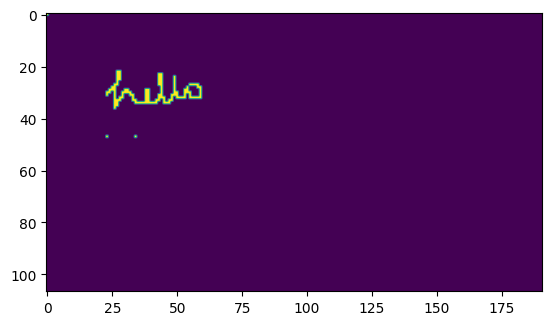

In [9]:
from matplotlib import pyplot as plt
plt.imshow(a.T)

In [10]:
from seqframe.seqframe import seq_frame
temp = []
no_sequences = 30
words = ['hello', 'world', 'i_am', 'yash']
for word in words:
    for i in range(no_sequences):
        c = np.load(f'word_data/{word}/{i}.npy')
        b = seq_frame(c, 'LSTM')
        # plt.imshow(b[-1].T)
        temp.append(b)

In [11]:
x = np.array(temp)

In [12]:
# x = np.reshape(x, (120, 220, -1, 1))
x.shape

(120, 220, 20437)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.1, shuffle=True, random_state=30)

In [14]:

model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu'))#, input_shape=(x.shape[1],x.shape[2])))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(4, activation='softmax'))
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [15]:
model.build(x.shape)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (120, 220, 64)            5248512   
                                                                 
 lstm_1 (LSTM)               (120, 220, 128)           98816     
                                                                 
 lstm_2 (LSTM)               (120, 64)                 49408     
                                                                 
 dense (Dense)               (120, 64)                 4160      
                                                                 
 dense_1 (Dense)             (120, 32)                 2080      
                                                                 
 dense_2 (Dense)             (120, 4)                  132       
                                                                 
Total params: 5403108 (20.61 MB)
Trainable params: 54031

In [16]:

model.fit(X_train,y_train, epochs=6)
# y.reshape(1,-1)

Epoch 1/6
4/4 [==============================] - 11s 2s/step - loss: 1.3831 - categorical_accuracy: 0.2778
Epoch 2/6
4/4 [==============================] - 8s 2s/step - loss: 1.3059 - categorical_accuracy: 0.5093
Epoch 3/6
4/4 [==============================] - 8s 2s/step - loss: 439.0719 - categorical_accuracy: 0.5278
Epoch 4/6
4/4 [==============================] - 8s 2s/step - loss: 1687955.1250 - categorical_accuracy: 0.2315
Epoch 5/6
4/4 [==============================] - 8s 2s/step - loss: 46103.1211 - categorical_accuracy: 0.2130
Epoch 6/6
4/4 [==============================] - 8s 2s/step - loss: 128071.1094 - categorical_accuracy: 0.2685


In [17]:
preds = model.predict(X_test)
# accuracy_score(y_test, preds)

1/1 [==============================] - 1s 635ms/step


In [18]:
y_true = np.argmax(y_test, axis=1)
y_hat = np.argmax(preds, axis=1)

In [19]:
accuracy_score(y_true, y_hat)

0.3333333333333333